In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
    sep= ',', header = None)

In [6]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [8]:
print ("Dataset Length: ", len(balance_data))
print ("Dataset Shape: ", balance_data.shape)

Dataset Length:  625
Dataset Shape:  (625, 5)


In [9]:
print ("Dataset: ",balance_data.head())

Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [10]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:, 0]

In [13]:
X

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [15]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [16]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [17]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)

In [18]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [19]:
y_pred_gini = clf_gini.predict(X_test)

In [20]:
y_pred_entropy = clf_entropy.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred_gini)

array([[ 0,  6,  7],
       [ 0, 67, 18],
       [ 0, 19, 71]], dtype=int64)

In [22]:
confusion_matrix(y_test, y_pred_entropy)

array([[ 0,  6,  7],
       [ 0, 63, 22],
       [ 0, 20, 70]], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred_gini)*100

73.40425531914893

In [24]:
accuracy_score(y_test,y_pred_entropy)*100

70.74468085106383

In [27]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [26]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
#accuracy_score(y_test,Ypred)*100

# RF

In [51]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)

In [4]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.shape

(150, 4)

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
data['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
data['is_train'] = np.random.uniform(0,1,len(data))<=0.75

In [13]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,True
146,6.3,2.5,5.0,1.9,virginica,True
147,6.5,3.0,5.2,2.0,virginica,False
148,6.2,3.4,5.4,2.3,virginica,True


In [14]:
train,test = data[data['is_train']==True], data[data['is_train']==False]

In [15]:
len(train)

118

In [16]:
len(test)

32

In [17]:
features = data.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [18]:
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
model = RandomForestClassifier(n_jobs=2, random_state=0)

In [20]:
model.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [21]:
model.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [23]:
model.predict_proba(test[features])[10:30]

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]])

In [24]:
preds = iris.target_names[model.predict(test[features])]

In [25]:
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [26]:
test['species']

7          setosa
8          setosa
10         setosa
13         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
23         setosa
27         setosa
31         setosa
38         setosa
52     versicolor
66     versicolor
68     versicolor
70     versicolor
72     versicolor
89     versicolor
98     versicolor
103     virginica
109     virginica
111     virginica
114     virginica
116     virginica
118     virginica
122     virginica
140     virginica
143     virginica
144     virginica
147     virginica
149     virginica
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [27]:
pd.crosstab(test['species'],preds,rownames=['Actual Species'],colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [31]:
preds = iris.target_names[model.predict([[5.0,3.6,1.4,2.0],[5.0,3.6,1.4,2.0]])]
preds

array(['setosa', 'setosa'], dtype='<U10')

# RF

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
# Load the wine datasets
wine = datasets.load_wine()
dataset = pd.DataFrame(wine.data)
dataset[13] = wine.target
dataset.columns = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline', 'class']

In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
dataset

,alcohal,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,od_dilutedwines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
dataset.describe()

,alcohal,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,od_dilutedwines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [18]:
dataset['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [20]:
Y = dataset['class']
Y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int32

In [21]:
X = dataset.drop('class',axis=1)

In [22]:
X

,alcohal,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,od_dilutedwines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [62]:
X_train.shape[1]

13

In [27]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [28]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
X_train_std

,alcohal,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,od_dilutedwines,proline
0,-0.161477,0.653125,0.107536,0.140926,0.362496,-1.724699,-0.967156,-0.935001,-1.473476,0.201741,-1.115187,-1.890307,-0.728593
1,-0.101456,0.491813,1.212605,0.435610,-0.252198,-1.335652,-1.695030,1.347595,-1.618744,-0.175857,-0.975582,-0.579833,-0.514047
2,0.882896,-0.476058,0.144372,-1.037812,-0.790055,0.382642,0.589685,-0.541450,0.306059,0.296140,0.792745,0.288907,1.692718
3,1.543131,-0.305784,1.286277,0.140926,1.591884,0.706848,0.973841,-0.226609,0.596595,0.579339,0.420466,-0.079203,1.570120
4,-1.433931,-0.709064,-1.402725,0.376673,-1.020565,-0.622398,-0.583000,-0.462740,-0.202380,-1.426651,-0.137954,0.922057,-0.835866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.638004,-0.529828,0.917920,1.909032,-0.866892,-0.719660,-0.572891,0.324362,-0.547391,-1.119852,1.769979,0.745364,-0.630515
120,-1.433931,-0.485020,-1.807917,-0.006417,-1.020565,0.220539,-0.542563,0.088232,-0.402123,-1.374731,-0.184488,-0.388416,-1.081062
121,-0.773695,-0.977917,-1.660574,0.023052,-1.635259,-0.411664,-0.178626,-0.698870,-1.092147,-0.138097,0.653140,1.142924,-0.789892
122,0.582789,-0.404364,0.881085,0.140926,-0.252198,0.269170,0.438045,-0.620160,0.033681,-0.685614,0.653140,1.643554,0.236866


In [30]:
cols = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline']
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [43]:
y_train.values.ravel()

array([2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0])

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier()

In [45]:
model.fit(X_train_std, y_train.values.ravel())

RandomForestClassifier()

In [70]:
importances = model.feature_importances_

In [71]:
importances

array([0.11613771, 0.03171916, 0.01317247, 0.01756187, 0.05279146,
       0.08665098, 0.15963606, 0.0067206 , 0.02272959, 0.17730784,
       0.05180231, 0.10903401, 0.15473594])

In [72]:
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
#np.argsort(importances)[::-1]
print(sorted_indices)

[ 9  6 12  0 11  5  4 10  1  8  3  2  7]


In [73]:
importances[sorted_indices]

array([0.17730784, 0.15963606, 0.15473594, 0.11613771, 0.10903401,
       0.08665098, 0.05279146, 0.05180231, 0.03171916, 0.02272959,
       0.01756187, 0.01317247, 0.0067206 ])

In [58]:
import matplotlib.pyplot as plt

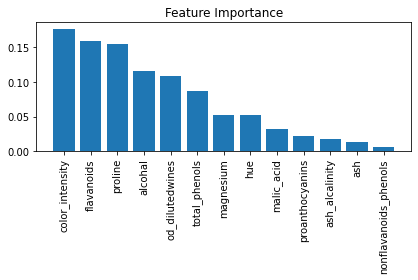

In [74]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()